In [18]:
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
import seaborn as sns
import pandas as pd
import geopandas as gpd
sns.set_context("talk")
sns.set_style("white")
sns.set(font_scale=1.5, style="white")
#var_surge = sel_test['return_surge_level']

## Dataset:

### Water level change indicators for the European coast from 1977 to 2100 derived from climate projections
https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-water-level-change-indicators?tab=overview

Statistics for `historical` ERA5 reanalysis: from 1979 to 2005

* `Annual mean highest high water level` : what Climate Central uses 

* `Highest astronomical tide` : more similar to what BRGM uses

* `Surge level` : storm surge for different return periods.  following return periods: 2, 5, 10, 25, 50 and 100 years. The return period is a standard way of describing the likelihood and severity of an event. It describes the estimated time interval between events of a similar size or intensity.

* `Tidal range`

* `Total water level` : storm surge and tidal contributions

Other sources : 
* Select values geographically:
https://cds.climate.copernicus.eu/cdsapp#!/software/app-coastal-indicators-waves-projections?tab=app


* BRGM tool: https://sealevelrise.brgm.fr/slr/#lng=-2.06337;lat=47.24195;zoom=11;level=1.0;layer=0

* Plot shapefile with xarray: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python-xarray/

## Define plotting function

In [20]:
def plot_map(
            df,
            var,
    vmin,
    vmax,
            label,
            title,
    cmap="cool",
                ):
    
    sns.set_context("talk")
    sns.set_style("white")

    fig,ax = plt.subplots(
        figsize=(10,15),
        subplot_kw={'projection':ccrs.PlateCarree()},

    )

    ax.coastlines(resolution='50m')
    ax.add_feature(cf.BORDERS)
    lon_left, lon_right = -5, 7.8
    lat_S, lat_N = 42, 51.5
    ax.set_extent([lon_left, lon_right, lat_S, lat_N])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    gl = ax.gridlines(color='Grey',draw_labels=True, alpha=0.5, linestyle='--')
    gl_space = 4
    gl.xlocator = mticker.FixedLocator(np.arange(lon_left-gl_space, lon_right+gl_space, gl_space))
    gl.ylocator = mticker.FixedLocator(np.arange(lat_S-gl_space, lat_N+gl_space, gl_space))
    fs = 15
    gl.xlabel_style = {'size': fs}
    gl.ylabel_style = {'size': fs}
    # add border of France

    df = pd.DataFrame({
        'lon': df.station_x_coordinate.values,
        'lat': df.station_y_coordinate.values, 
        'var': df[var].values   # return_water_level

    })
    sc = ax.scatter(
        df['lon'],
        df['lat'],
        c=df['var'],
        #c=np.log(df['surge']),
        cmap=cmap, #plasma , seismic, GnBu, plasma_r
        s=30,
        vmin =vmin, 
     vmax = vmax,
               )
    import matplotlib as mpl
    cbar = fig.colorbar(sc,
                       fraction=0.04,
                anchor=(-1,0.5),
                        #norm=mpl.colors.Normalize(vmin=0.5, vmax=1)
                       )

    cbar.set_label(
        label=label,
       # "log of historical storm surge, \n 2 yr return period (m)",  # log of 
                   labelpad=5
                  )
    plt.title(title)
    
    ax.axis('off')
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    plt.box(on=None)

## Load storm surge values for different return periods, from historical simulation

In [21]:
# 2 year return period
# historical 1977-2005

folder_path = '/Users/annalea_albright/Dropbox/BPCE/Data/storm_surge/'

fp_hist_2 = os.path.join(folder_path, 'historical-RPS-rp2-v0.0.nc')
df_hist_2 = xr.open_dataset(fp_hist_2)
#print(df_hist_2.variables.values)
#print(df_hist_2.summary)

# 5 year return period
fp_hist_5 = os.path.join(folder_path, 'historical-RPS-rp5-v0.0.nc')
df_hist_5 = xr.open_dataset(fp_hist_5)

# 100 year return period, in case we are wrong about stationarity
fp_hist_100 = os.path.join(folder_path, 'historical-RPS-rp100-v0.0.nc')
df_hist_100 = xr.open_dataset(fp_hist_100)

## 2 year return period

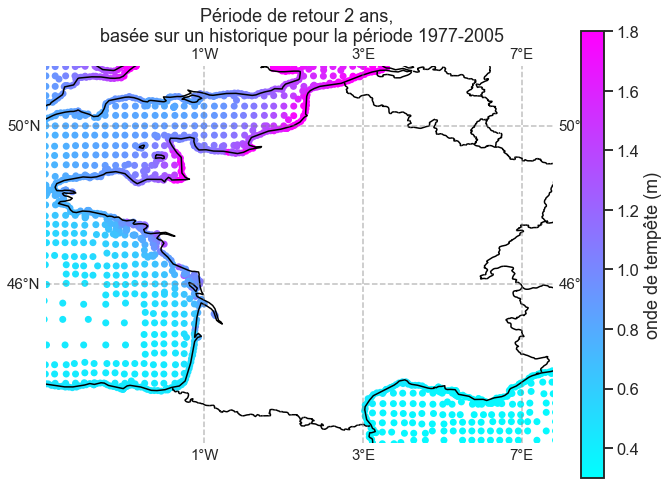

In [22]:
plot_map(
        df = df_hist_2, 
             var="return_surge_level",
       #vmin=0.3,
   # vmax=3,
    vmin=0.3,
    vmax=1.8,
    label="onde de tempête (m)", 
        title="Période de retour 2 ans, \n basée sur un historique pour la période 1977-2005", 
            )

## 5 year return period

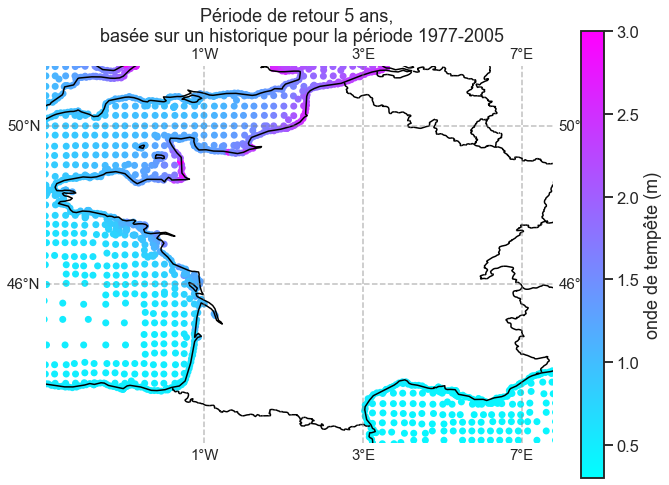

In [23]:
plot_map(
        df = df_hist_5, 
             var="return_surge_level",
    vmin=0.3,
    vmax=3,
    label="onde de tempête (m)", 
        title="Période de retour 5 ans, \n basée sur un historique pour la période 1977-2005", 
            )

## 100 year return period

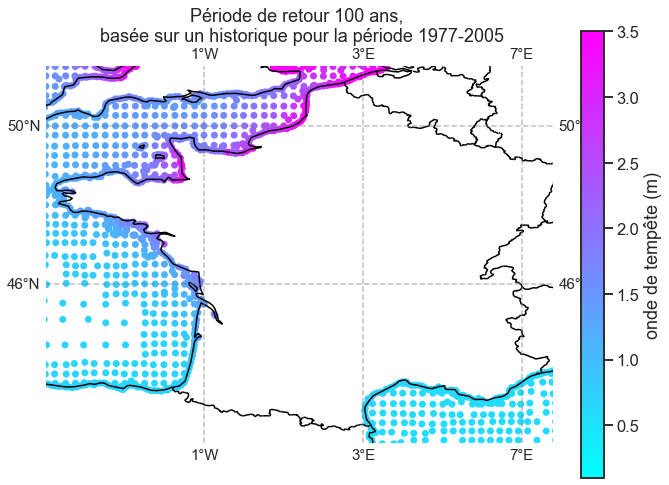

In [24]:
plot_map(
        df = df_hist_100, 
             var="return_surge_level",
    vmin=0.1,
    vmax=3.5,
    label="onde de tempête (m)", 
        title="Période de retour 100 ans, \n basée sur un historique pour la période 1977-2005", 
            )

## Examining stationarity through RCP 4.5 - historical storm surge for 2 year return period

In [29]:
# RCP 4.5 scenario
fp_rcp45_2 = '/Users/annalea_albright/Dropbox/BPCE/Data/storm_surge/rcp45_end_century-RPS-rp2-v0.0.nc'

df_rcp45_2 = xr.open_dataset(fp_rcp45_2)
print(df_rcp45_2.variables.values)
print(df_rcp45_2.summary)

<bound method Mapping.values of Frozen({'station_x_coordinate': <xarray.Variable (stations: 23256)>
[23256 values with dtype=float64]
Attributes:
    long_name:   longitude
    short_name:  longitude, 'station_y_coordinate': <xarray.Variable (stations: 23256)>
[23256 values with dtype=float64]
Attributes:
    long_name:   latitude
    short_name:  latitude, 'return_surge_level': <xarray.Variable (stations: 23256)>
[23256 values with dtype=float64]
Attributes:
    units:       m
    long_name:   Return surge level for 2 year return period
    short_name:  return_levels})>
Dataset with return values for surge. Produced with the Global Tide and Surge Model (GTSM) version 3.0 forced with winds and sea surface pressure from EC-EARTH_DMI-HIRHAM5 dataset for period 2071_2100. Sea-level-rise forced with forced from the RCP45 ensemble mean from the AR5 IPCC report (ref: Church et al., 2013; url: http://icdc.cen.uni-hamburg.de/1/daten/ocean/ar5-slr.html). Return periods are based on fitting a Gu

In [26]:
gauge_name = ['Cherbourg', 'Le_Havre', 'Dunkerque', 'Brest', 'St_Nazaire',
              'La Rochelle', 'St_Jean-de-Luz', 'Marseille', 'Toulon', 'Nice']


gauge_number = [467, 453, 468, 1, 457, 466, 469, 61, 980, 1468]


lats = [49.65, 49.48, 51.05, 48.38, 47.27, 46.16, 43.40, 43.28, 43.11, 43.70]

lons = [-1.64, 0.11, 2.37, -4.49, -2.20, -1.22, -1.68, 5.35, 5.91, 7.29]

#np.random.seed(10)
#colors = np.asarray([(np.random.random(size=3) * 256) for i in range(12)])
colors = ['turquoise', 'deeppink', 'crimson', 'indigo',
          'gold', 'green','lime', 'royalblue','peru', 'lightskyblue',
          #'navy', 'slategrey',
         ]
location_data = xr.Dataset(
    data_vars={
        "gauge_name": (("gauge_number"), gauge_name),
        "lat": (("gauge_number"), lats),
        "lon": (("gauge_number"), lons),
        "color": (("gauge_number"), colors),
                #"alpha": (("gauge_number"), alphas),


    },
    coords={"gauge_number": gauge_number},
)
print(location_data)

<xarray.Dataset>
Dimensions:       (gauge_number: 10)
Coordinates:
  * gauge_number  (gauge_number) int64 467 453 468 1 457 466 469 61 980 1468
Data variables:
    gauge_name    (gauge_number) <U14 'Cherbourg' 'Le_Havre' ... 'Toulon' 'Nice'
    lat           (gauge_number) float64 49.65 49.48 51.05 ... 43.28 43.11 43.7
    lon           (gauge_number) float64 -1.64 0.11 2.37 ... 5.35 5.91 7.29
    color         (gauge_number) <U12 'turquoise' 'deeppink' ... 'lightskyblue'


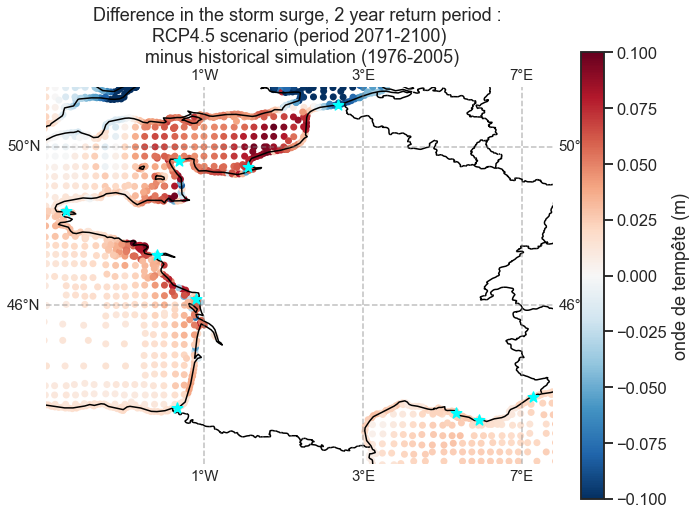

In [27]:
diff_2 = df_rcp45_2 - df_hist_2


plot_map(
        df = diff_2, 
             var="return_surge_level",
       #vmin=0.3,
   # vmax=3,
    vmin=-0.1,
    vmax=0.1,
    label="onde de tempête (m)", 
    title='Difference in the storm surge, 2 year return period : \n RCP4.5 scenario (period 2071-2100) \n minus historical simulation (1976-2005)',
            cmap="RdBu_r",
)

plt.scatter(
        location_data.lon.values,
        location_data.lat.values,
        color="cyan",
    marker='*',
        s=120,
        zorder=11,
    )

# Tides

In [34]:
# Highest astronomical tide,  variable HAT
df_tides = xr.open_dataset('/Users/annalea_albright/Dropbox/BPCE/Data/tides/historical-HAT-v0.0.nc')

# Annual mean highest high water level
df_tides_AMHHW = xr.open_dataset('/Users/annalea_albright/Dropbox/BPCE/Data/tides/historical-AMHHW-v0.0.nc')

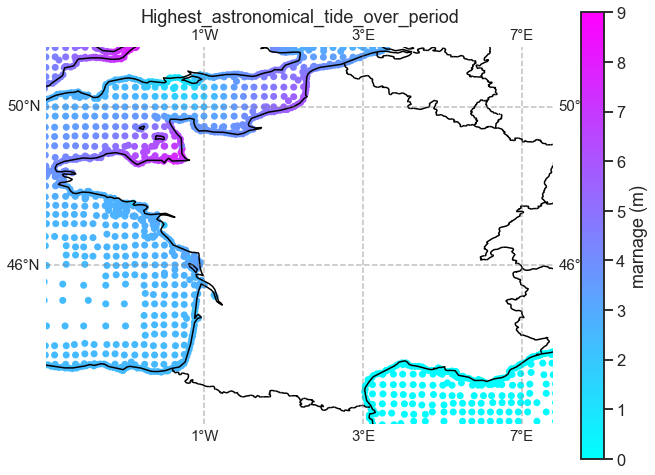

In [35]:
plot_map(
        df = df_tides, 
             var="HAT",
       #vmin=0.3,
   # vmax=3,
    vmin=0,
    vmax=9,
    label="marnage (m)", 
        title="Highest_astronomical_tide_over_period", 
            )

## Tidal range

In [37]:
# tidal range
df_tidal_range = xr.open_dataset('/Users/annalea_albright/Dropbox/BPCE/Data/tides/historical-tidal_range-v0.0.nc')

print(df_tidal_range)
print(df_tidal_range.variables.values)
print(df_tidal_range.summary)

<xarray.Dataset>
Dimensions:               (stations: 23256)
Coordinates:
  * stations              (stations) |S40 b'id_coast_glob_eur_00001' ... b'is...
    station_x_coordinate  (stations) float64 ...
    station_y_coordinate  (stations) float64 ...
Data variables:
    tidal_range           (stations) float64 ...
Attributes:
    geospatial_lon_min:   150
    source:               GTSMv3.0 (D-FLOW FM) in tide-only mode
    geospatial_lat_max:   72.5
    contact:              c3s422.support@deltares.nl
    time_coverage_start:  
    licence:              
    time_coverage_end:    
    geospatial_lat_min:   25
    geospatial_lon_max:   225
    summary:               Tidal indicators produced with the Global Tide and...
<bound method Mapping.values of Frozen({'stations': <xarray.IndexVariable 'stations' (stations: 23256)>
array([b'id_coast_glob_eur_00001', b'id_coast_glob_eur_00002',
       b'id_coast_glob_eur_00003', ..., b'islands_66666713',
       b'islands_66666714', b'islands_8888

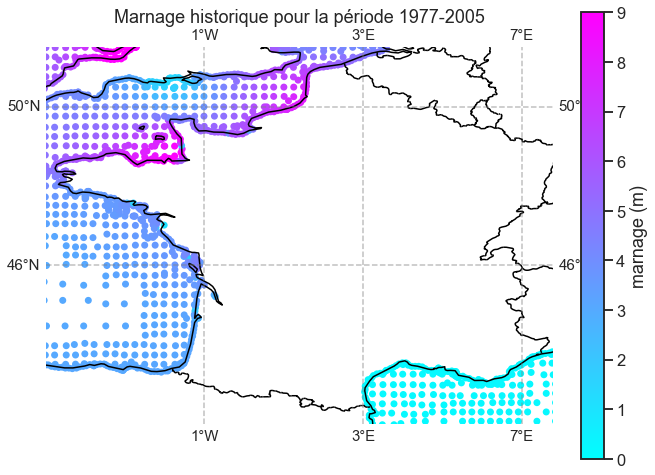

In [38]:
plot_map(
        df = df_tidal_range, 
             var="tidal_range",
       #vmin=0.3,
   # vmax=3,
    vmin=0,
    vmax=9,
    label="marnage (m)", 
        title="Marnage historique pour la période 1977-2005", 
            )

# Waves

In [30]:
fp_hist = '/Users/annalea_albright/Dropbox/BPCE/Data/waves/historical-swh-p90-v0.0.nc'
test_hist = xr.open_dataset(fp_hist)

fp_rcp = '/Users/annalea_albright/Dropbox/BPCE/Data/waves/rcp45_end_century-swh-p90-v0.0.nc' 
test_rcp = xr.open_dataset(fp_rcp)

print(test_rcp.variables.values)
print(test_rcp.p90.short_name)

print(test_rcp.summary)

<bound method Mapping.values of Frozen({'p90': <xarray.Variable (locs: 7708)>
[7708 values with dtype=float64]
Attributes:
    units:       m
    long_name:   90th percentile  of significant height of combined wind wave...
    short_name:  90th percentile  of significant height of combined wind wave..., 'station_x_coordinate': <xarray.Variable (locs: 7708)>
[7708 values with dtype=float64]
Attributes:
    units:       degrees_east
    long_name:   longitude
    short_name:  longitude, 'station_y_coordinate': <xarray.Variable (locs: 7708)>
[7708 values with dtype=float64]
Attributes:
    units:       degrees_north
    long_name:   latitude
    short_name:  latitude})>
90th percentile  of significant height of combined wind waves and swell
wave statistical indicators at locations along 20-m depth line of European coast and other specific locations for RCP45 scenario and period 2071-2100


In [31]:
test_diff = test_rcp - test_hist
test_diff

<xarray.Dataset>
Dimensions:               (locs: 7708)
Coordinates:
    station_x_coordinate  (locs) float64 322.1 322.2 322.3 ... 43.6 43.6 43.6
    station_y_coordinate  (locs) float64 65.6 65.5 65.5 65.5 ... 67.7 67.2 66.9
Dimensions without coordinates: locs
Data variables:
    p90                   (locs) float64 0.04922 -0.0473 ... 0.2297 0.1637

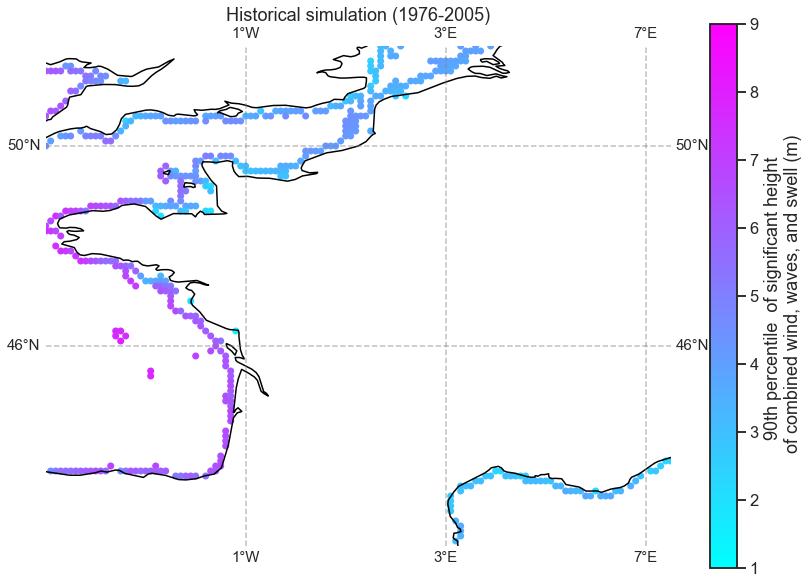

In [32]:
sns.set_context("talk")
sns.set_style("white")


test = test_hist #diff
# can you select an xarray dataset based on shapefile?
# https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile
# have a shapefile of the French coast

fig,ax = plt.subplots(
    subplot_kw={'projection':ccrs.PlateCarree()},
                      figsize=(14,10))
ax.coastlines(resolution='50m')

# add country lines
#lon_left, lon_right = -5, 3
#lat_S, lat_N = 43.6, 51

lon_left, lon_right = -5, 7.5
lat_S, lat_N = 42, 52

#lon_left, lon_right = -10, 40
#lat_S, lat_N = 42, 51

ax.set_extent([lon_left, lon_right, lat_S, lat_N])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(color='Grey',draw_labels=True, alpha=0.5, linestyle='--')
gl_space = 4
gl.xlocator = mticker.FixedLocator(np.arange(lon_left-gl_space, lon_right+gl_space, gl_space))
gl.ylocator = mticker.FixedLocator(np.arange(lat_S-gl_space, lat_N+gl_space, gl_space))
fs = 15
gl.xlabel_style = {'size': fs}
gl.ylabel_style = {'size': fs}
# add border of France

df = pd.DataFrame({
    'lon': test.station_x_coordinate.values,
    'lat': test.station_y_coordinate.values, 
    'surge': test["p90"].values,
    #test_rcp["p90"].values - test_hist["p90"].values   # return_water_level
    
})
sc = ax.scatter(
    df['lon'],
    df['lat'],
    c=df['surge'],
    #c=np.log(df['surge']),
    cmap="cool", # cool plasma , seismic, GnBu, plasma_r
    s=30,
    #vmin=-0.2,
    #vmax=0.2,
    vmin = 1, 
     vmax = 9 #8
           )
import matplotlib as mpl
cbar = fig.colorbar(sc,
                   #frac25ion=0.7,
               anchor=(0.3,0.0),
                    #norm=mpl.colors.Normalize(vmin=0.5, vmax=1)
                   )

cbar.set_label(
    "90th percentile  of significant height \n of combined wind, waves, and swell (m)",
        #"historical storm surge, \n 2 yr return period (m)",  # log of 
   # "log of historical storm surge, \n 2 yr return period (m)",  # log of 
               labelpad=5
              )
plt.title('Historical simulation (1976-2005)')
ax.axis('off')
right_side = ax.spines["right"]
right_side.set_visible(False)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.box(on=None)
#plt.title('Difference RCP4.5 scenario (period 2071-2100) \n minus historical simulation (1976-2005)')

Text(0.5, 1.0, 'Difference RCP4.5 scenario (period 2071-2100) \n minus historical simulation (1976-2005)')

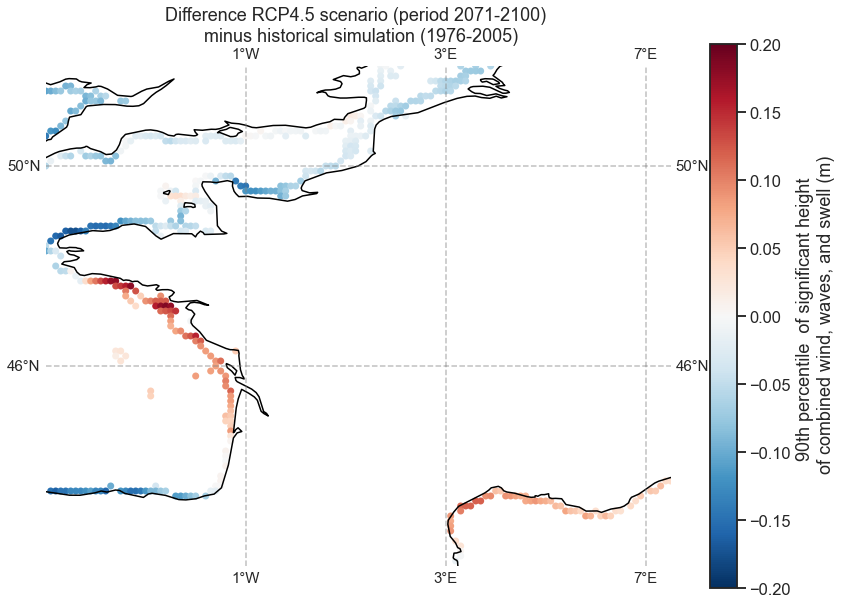

In [33]:
sns.set_context("talk")
sns.set_style("white")


test = test_diff
# can you select an xarray dataset based on shapefile?
# https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile
# have a shapefile of the French coast

fig,ax = plt.subplots(
    subplot_kw={'projection':ccrs.PlateCarree()},
                      figsize=(14,10))
ax.coastlines(resolution='50m')

# add country lines
#lon_left, lon_right = -5, 3
#lat_S, lat_N = 43.6, 51

lon_left, lon_right = -5, 7.5
lat_S, lat_N = 42, 52

#lon_left, lon_right = -10, 40
#lat_S, lat_N = 42, 51

ax.set_extent([lon_left, lon_right, lat_S, lat_N])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(color='Grey',draw_labels=True, alpha=0.5, linestyle='--')
gl_space = 4
gl.xlocator = mticker.FixedLocator(np.arange(lon_left-gl_space, lon_right+gl_space, gl_space))
gl.ylocator = mticker.FixedLocator(np.arange(lat_S-gl_space, lat_N+gl_space, gl_space))
fs = 15
gl.xlabel_style = {'size': fs}
gl.ylabel_style = {'size': fs}
# add border of France

df = pd.DataFrame({
    'lon': test.station_x_coordinate.values,
    'lat': test.station_y_coordinate.values, 
    'surge': test["p90"].values,
    #test_rcp["p90"].values - test_hist["p90"].values   # return_water_level
    
})
sc = ax.scatter(
    df['lon'],
    df['lat'],
    c=df['surge'],
    #c=np.log(df['surge']),
    cmap="RdBu_r", # cool, plasma , seismic, GnBu, plasma_r
    s=30,
    vmin=-0.2,
    vmax=0.2,
    #vmin = 1, 
     #vmax = 9 #8
           )
import matplotlib as mpl
cbar = fig.colorbar(sc,
                   #frac25ion=0.7,
               anchor=(0.3,0.0),
                    #norm=mpl.colors.Normalize(vmin=0.5, vmax=1)
                   )

cbar.set_label(
    "90th percentile  of significant height \n of combined wind, waves, and swell (m)",
        #"historical storm surge, \n 2 yr return period (m)",  # log of 
   # "log of historical storm surge, \n 2 yr return period (m)",  # log of 
               labelpad=5
              )
plt.title('Historical simulation (1976-2005)')
ax.axis('off')
right_side = ax.spines["right"]
right_side.set_visible(False)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.box(on=None)
plt.title('Difference RCP4.5 scenario (period 2071-2100) \n minus historical simulation (1976-2005)')